#### We will perform some operations on the image below 

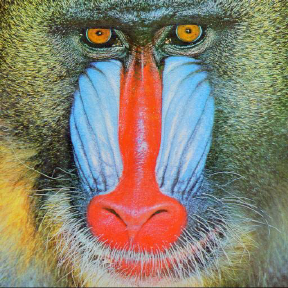

In [2]:
# Import the necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read in the image using the imread function
img_path = "C:\\Users\\DELL\\OneDrive\\Documents\\mandrill_colour.png"
image = cv2.imread(img_path)

### Accessing Image Properties

Image properties include number of rows, columns, and channels; type of image data; number of pixels; etc.

In [4]:
# Let's look at the type of the array.
type(image)

numpy.ndarray

In [5]:
# Let's get dimensions or the shape of image
dimensions = image.shape
 
# height, width, number of channels in image
height = image.shape[0]
width = image.shape[1]
channels = image.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (288, 288, 3)
Image Height       :  288
Image Width        :  288
Number of Channels :  3


#### Shape
(288, 288, 3)
#### The shape of an image is accessed by image.shape. 
`It returns a tuple of the number of rows, columns, and channels (if the image is color)`.The width is the number of columns and the height is the number of rows

- 288: Pixel width
- 288: Pixel height
- 3: color channel


In other words, img.shape returns (Height, Width, Number of Channels)
- Height represents the number of pixel rows in the image 
- Width represents the number of pixel columns in the image 
- Number of Channels represents the number of components used to represent each pixel.

`If an image is grayscale, the tuple returned contains only the number of rows and columns`, so it is a good method to check whether the loaded image is grayscale or color.

In [6]:
# Total number of pixels is accessed by image.size:
image.size

248832

- 288 * 288 * 3 = 248,832

In [7]:
# Image datatype is obtained by `image.dtype`:
image.dtype

dtype('uint8')

### Operations On Images

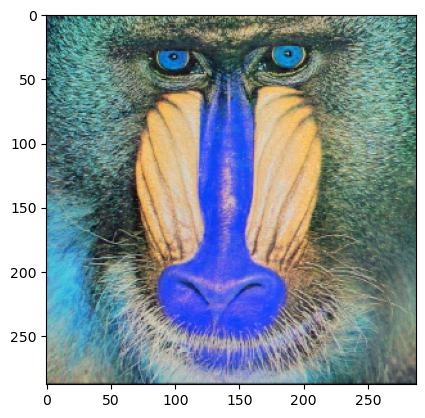

In [8]:
# Displaying the image using matplotlib
plt.imshow(image)

- Here  the output above is a bit different with regards color as compared to the original image. We expected a bright colored image but what we obtain is an image with some bluish tinge.
- That happens because OpenCV and matplotlib have different orders of primary colors. Whereas `OpenCV` reads images in the form of [BGR], `matplotlib`, on the other hand, follows the order of [RGB].
- Thus, when we read a file through `OpenCV`, we read it as if it contains channels in the order of blue, green and red. However, when we display the image using `matplotlib`, the red and blue channel gets swapped and hence the blue tinge. 
- To avoid this issue, we will transform the channel to how matplotlib expects it to be using the `cvtColor` function.

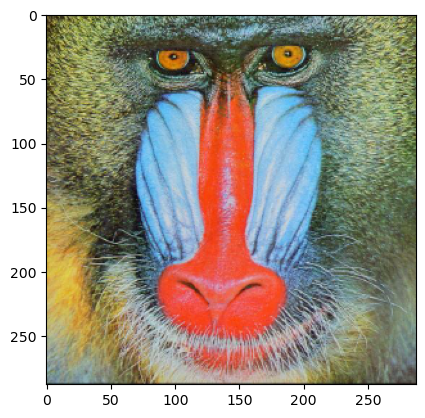

In [9]:
img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### Saving images 

Images can be saved in the working directory as follows:
`cv2.imwrite('final_image.png',image)`
where "final_image" is the name of the image being saved.

In [10]:
cv2.imwrite('final_mandrill_image.png',image)

True

### Basic Operations on Images

#### Drawing on Images

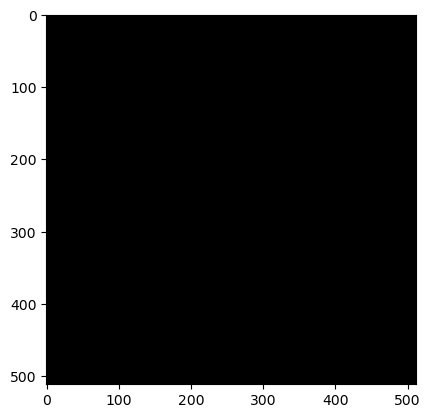

In [11]:
# Let's create a black image which will act as a template for our drawing.

new_image = np.zeros(shape=(512,512,3), dtype=np.int16)
plt.imshow(new_image)

The generalised function for drawing shapes on images is:

`cv2.shape(line, rectangle etc)(image,Pt1,Pt2,color,thickness)`

There are some common arguments which are passed in the function to draw shapes on images:

- Image on which shapes are to be drawn
- Co-ordinates of the shape to be drawn from Pt1(top left) to Pt2(bottom right)
- Color: The color of the shape that is to be drawn. It is passed as a tuple, eg: (255,0,0). For grayscale, it will be the scale of brightness.
- The thickness of the geometrical figure.

Let's now draw some shapes on our image above

#### 1. Straight Line
- Drawing a straight line across an image requires specifying the points, through which the line will pass.


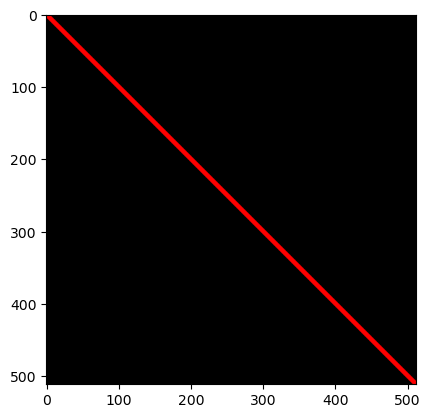

In [12]:
# Draw a diagonal red line with thickness of 5 px
line_red = cv2.line(new_image,(0,0),(511,511),(255,0,0),5)
plt.imshow(line_red)

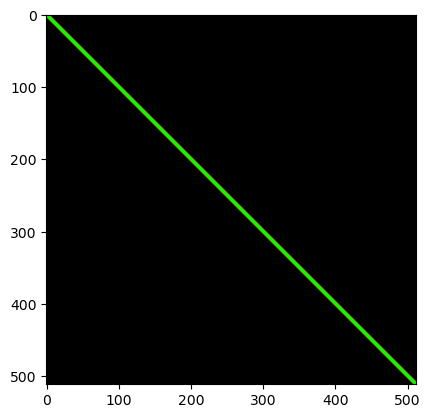

In [13]:
# Draw a diagonal green line with thickness of 3 px
line_green = cv2.line(new_image,(0,0),(511,511),(0,255,0),3)
plt.imshow(line_green)

#### 2. Rectangle
- For a rectangle, we need to specify the top left and the bottom right coordinates.

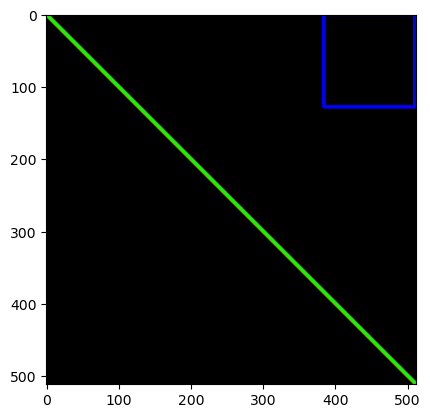

In [14]:
#Draw a blue rectangle with a thickness of 3 px

rectangle= cv2.rectangle(new_image,(384,0),(510,128),(0,0,255),3)
plt.imshow(rectangle)

#### 3. Circle
- For a circle, we need to pass its center coordinates and radius value. Let us draw a circle inside the rectangle drawn above


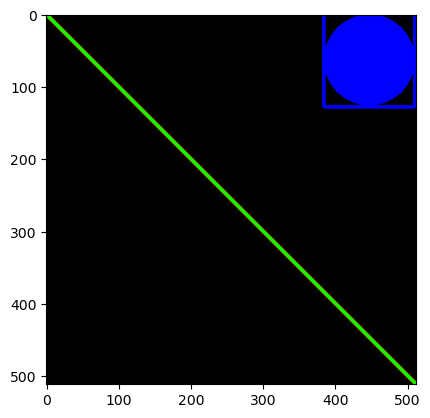

In [15]:
circle = cv2.circle(new_image,(447,63), 63, (0,0,255), -1) # -1 corresponds to a filled circle
plt.imshow(circle)

#### Writing on Images

Adding text to images is also similar to drawing shapes on them. But you need to specify certain arguments before doing so:

- Text to be written
- coordinates of the text. The text on an image begins from the bottom left direction.
- Font type and scale.
- Other attributes like color, thickness and line type. Normally the line type that is used is lineType = cv2.LINE_AA.



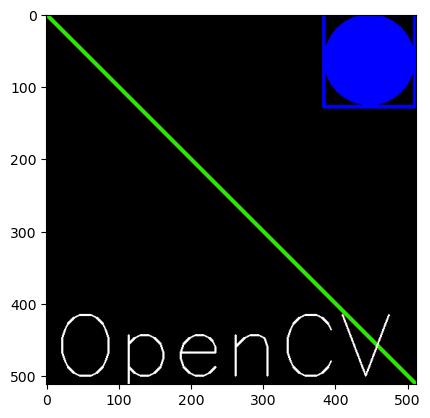

In [17]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(new_image,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(text)

#### For more info look at these references
- [https://www.datacamp.com/tutorial/face-detection-python-opencv]
- [https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html]